# Introduction to neural network classification with tensorflow

**Types of classification**

1. Binary Classification
2. Multiclass Classification
3. Multilabel Classification

## Creating Data of view and fit

In [ ]:
from sklearn.datasets import make_circles
import tensorflow as tf

# Make 1000 examples 
n_samples = 1000

# Create samples
X , y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

In [ ]:
# Check out the features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Lets visualize our data

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,0],"label":y})
circles

,X0,X1,label
0,0.754246,0.754246,1
1,-0.756159,-0.756159,1
2,-0.815392,-0.815392,1
3,-0.393731,-0.393731,1
4,0.442208,0.442208,0
...,...,...,...
995,0.244054,0.244054,0
996,-0.978655,-0.978655,0
997,-0.136900,-0.136900,1
998,0.670362,0.670362,0


<BarContainer object of 1000 artists>

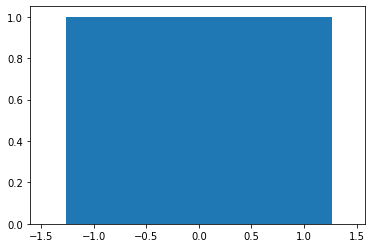

In [ ]:
# Visualising with plot
import matplotlib.pyplot as plt

plt.bar(circles.X0,circles.label)

<BarContainer object of 1000 artists>

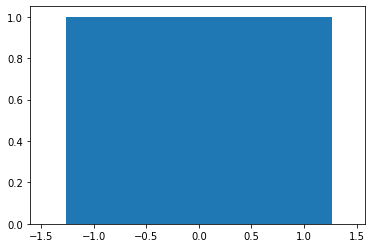

In [ ]:
plt.bar(circles.X1,circles.label)

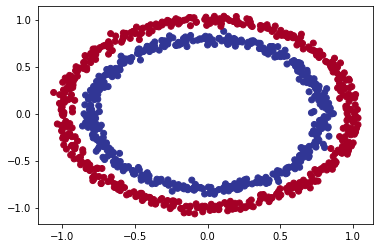

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

## Input Output Shapes

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
X = tf.constant(X)
y = tf.constant(y)

In [ ]:
X,y

(<tf.Tensor: shape=(1000, 2), dtype=float64, numpy=
 array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]])>,
 <tf.Tensor: shape=(1000,), dtype=int64, numpy=
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
  

## Steps in modelling

1. Create or Import The model
2. Compile the model
3. Fit your Data to the model
3. Predict Your Data from the model
4. Evaluate the model
5. Tune your model

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2.Compile the model

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model

model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 2.7406 - accuracy: 0.4925
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7410 - accuracy: 0.4992
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7079 - accuracy: 0.4961
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.4986
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5012
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4930
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4867
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4849
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5027
Epoch 11/

In [ ]:
model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=500)

Epoch 1/500
32/32 [==============================] - 0s 4ms/step - loss: 0.6938 - accuracy: 0.4690
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4966
Epoch 3/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4893
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4772
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4882
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5066
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4993
Epoch 8/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4702
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4903
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4980
Epoch 11/

## Improving Our Model

In [ ]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933151483535767, 0.5]

In [ ]:
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(1000),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(20),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(tf.expand_dims(X,axis=-1),y,epochs=300,verbose=1)

Epoch 1/300
32/32 [==============================] - 3s 43ms/step - loss: 7.6229 - accuracy: 0.4940
Epoch 2/300
32/32 [==============================] - 1s 43ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 3/300
32/32 [==============================] - 2s 68ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 4/300
32/32 [==============================] - 1s 42ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 5/300
32/32 [==============================] - 1s 41ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 6/300
32/32 [==============================] - 1s 42ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 7/300
32/32 [==============================] - 1s 42ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 8/300
32/32 [==============================] - 1s 39ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 9/300
32/32 [==============================] - 1s 28ms/step - loss: 7.6246 - accuracy: 0.5000
Epoch 10/300
32/32 [==============================] - 1s 29ms/step - loss: 7.6246 - accuracy: 0.5000